In [1]:
import utils_clean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
missing_pct = [0, 10,25,50,75, 90]


In [2]:
import utils

In [8]:
utils.load_adult()["train"]

age  education  education-num  occupation  relationship  \
3230   0.315068   1.000000       0.600000    0.846154           0.0   
2833   0.342466   1.000000       0.600000    0.153846           0.0   
12654  0.013699   0.000000       0.333333    0.846154           0.6   
6266   0.191781   0.733333       0.533333    0.153846           0.0   
11549  0.273973   1.000000       0.600000    0.230769           0.0   
...         ...        ...            ...         ...           ...   
10464  0.643836   0.733333       0.533333    0.153846           0.0   
5228   0.520548   0.733333       0.533333    0.230769           0.8   
15456  0.027397   1.000000       0.600000    0.538462           0.6   
20030  0.342466   0.733333       0.533333    0.000000           0.2   
8363   0.301370   0.933333       0.933333    0.230769           1.0   

       capital-gain  capital-loss  hours-per-week  native-country  race  \
3230       0.000000      0.000000        0.500000           0.950     0   
2833       0.076881      0.000000        0.448980           0.950     0   
12654      0.000000      0.000000        0.397959           0.950     0   
6266       0.000000      0.000000        0.397959           0.950     0   
11549      0.000000      0.000000        0.397959           0.950     0   
...             ...           ...             ...             ...   ...   
10464      0.000000      0.000000        0.500000           0.950     0   
5228       0.000000      0.561065        0.602041           0.950     0   
15456      0.000000      0.000000        0.397959           0.625     0   
20030      0.000000      0.000000        0.397959           0.950     0   
8363       0.150242      0.000000        0.469388           0.950     0   

       gender  marital-status  workclass  income  
3230        1               1          1       0  
2833        1               1          0       1  
12654       1               1          1       0  
6266        1               1          1       0  
11549       1               1          1       1  
...       ...             ...        ...     ...  
10464       1               1          1       0  
5228        1               0          1       1  
15456       0               1          1       0  
20030       0               0          1       0  
8363        0               1          1       1  

[40388 rows x 14 columns]

In [10]:
utils.load_compas_alt()["train"]

priors_count  crime_factor  gender_factor  is_Caucasian  \
4474             1             0              1             0   
1384             0             1              0             1   
1175             1             1              1             1   
3540             0             0              1             0   
88               1             0              1             1   
...            ...           ...            ...           ...   
10               0             0              1             0   
5987             1             0              0             0   
616              1             0              1             1   
3848             1             1              1             0   
4397             1             0              1             1   

      age_factor_Greater than 45  age_factor_Less than 25  two_year_recid  
4474                           0                        0               0  
1384                           1                        0               0  
1175                           1                        0               0  
3540                           1                        0               0  
88                             0                        1               0  
...                          ...                      ...             ...  
10                             0                        0               1  
5987                           0                        0               0  
616                            0                        1               0  
3848                           0                        0               0  
4397                           0                        0               1  

[4135 rows x 7 columns]

In [3]:
data = utils_clean.run("two_year_recid", "priors_count", "gender_factor", models = ["log_reg"], dataset = "recid", n_runs = 2, robust=False, with_mcar=False)

  0%|          | 0/2 [00:00<?, ?it/s]

fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca


 50%|█████     | 1/2 [14:19<14:19, 859.22s/it]

fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca
fair_reg_95
cca
fair_reg_95


100%|██████████| 2/2 [28:53<00:00, 866.81s/it]

cca


In [4]:
"""fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(missing_pct, data["Averaged results"]['mcar|acc|log_reg|fair_reg_50'], label = "fair_reg_50")
plt.plot(missing_pct, data["Averaged results"]['mcar|acc|log_reg|fair_reg_95'], label = "fair_reg_95")
plt.plot(missing_pct, data["Averaged results"]['mcar|acc|log_reg|mice_def'], label = "mice_def")
plt.plot(missing_pct, data["Averaged results"]['mcar|acc|log_reg|mean'], label = "mean")
plt.plot(missing_pct, data["Averaged results"]['mcar|acc|log_reg|cca'], label = "cca")
plt.legend()
plt.show()"""

'fig = plt.gcf()\nfig.set_size_inches(18.5, 10.5)\nplt.plot(missing_pct, data["Averaged results"][\'mcar|acc|log_reg|fair_reg_50\'], label = "fair_reg_50")\nplt.plot(missing_pct, data["Averaged results"][\'mcar|acc|log_reg|fair_reg_95\'], label = "fair_reg_95")\nplt.plot(missing_pct, data["Averaged results"][\'mcar|acc|log_reg|mice_def\'], label = "mice_def")\nplt.plot(missing_pct, data["Averaged results"][\'mcar|acc|log_reg|mean\'], label = "mean")\nplt.plot(missing_pct, data["Averaged results"][\'mcar|acc|log_reg|cca\'], label = "cca")\nplt.legend()\nplt.show()'

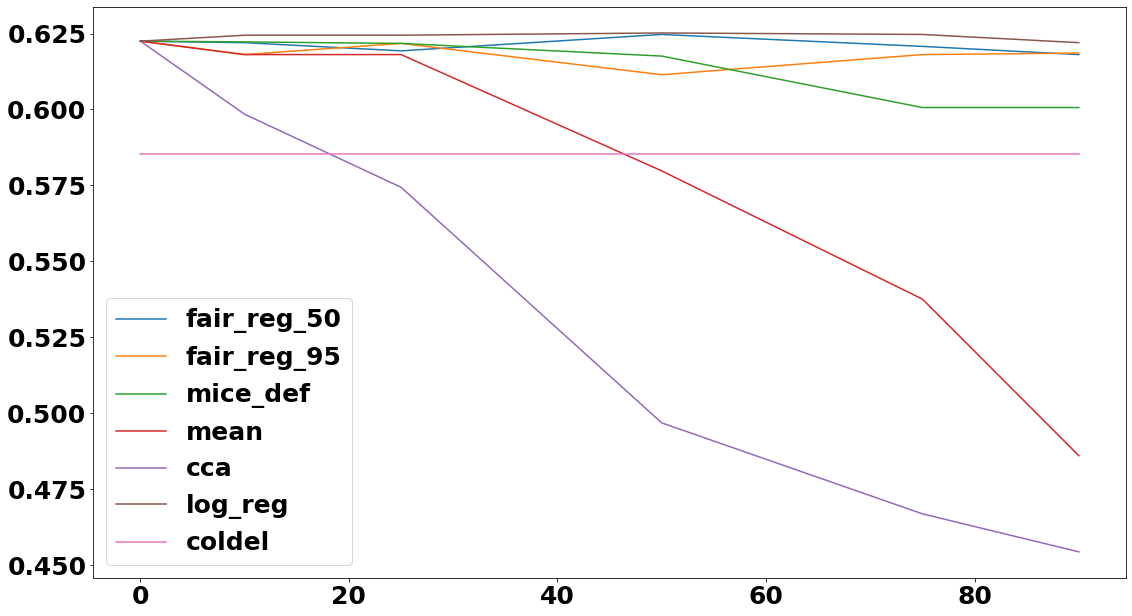

In [12]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|fair_reg_50'], label = "fair_reg_50")
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|fair_reg_95'], label = "fair_reg_95")
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|mice_def'], label = "mice_def")
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|mean'], label = "mean")
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|cca'], label = "cca")
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|log_reg'], label = "log_reg")
plt.plot(missing_pct, data["Averaged results"]['mar|acc|log_reg|coldel'], label = "coldel")
plt.legend()
plt.show()

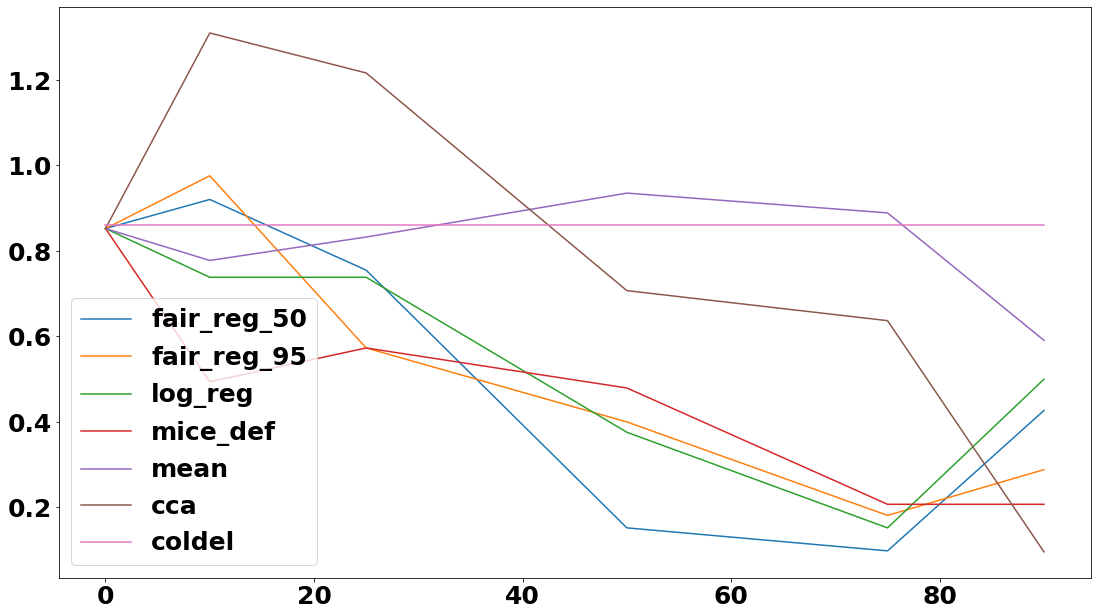

In [13]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|fair_reg_50'], label = "fair_reg_50")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|fair_reg_95'], label = "fair_reg_95")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|log_reg'], label = "log_reg")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|mice_def'], label = "mice_def")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|mean'], label = "mean")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|cca'], label = "cca")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|coldel'], label = "coldel")
plt.legend()
plt.show()


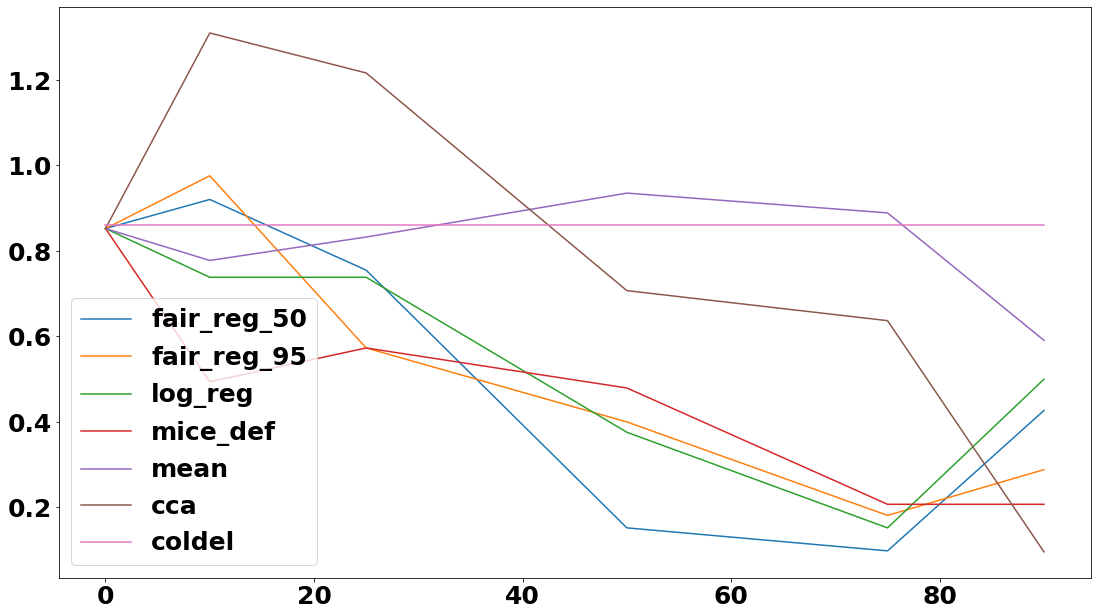

In [15]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|fair_reg_50'], label = "fair_reg_50")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|fair_reg_95'], label = "fair_reg_95")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|log_reg'], label = "log_reg")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|mice_def'], label = "mice_def")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|mean'], label = "mean")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|cca'], label = "cca")
plt.plot(missing_pct, data["Averaged results"]['mar|eosum|log_reg|coldel'], label = "coldel")
plt.legend()
plt.show()


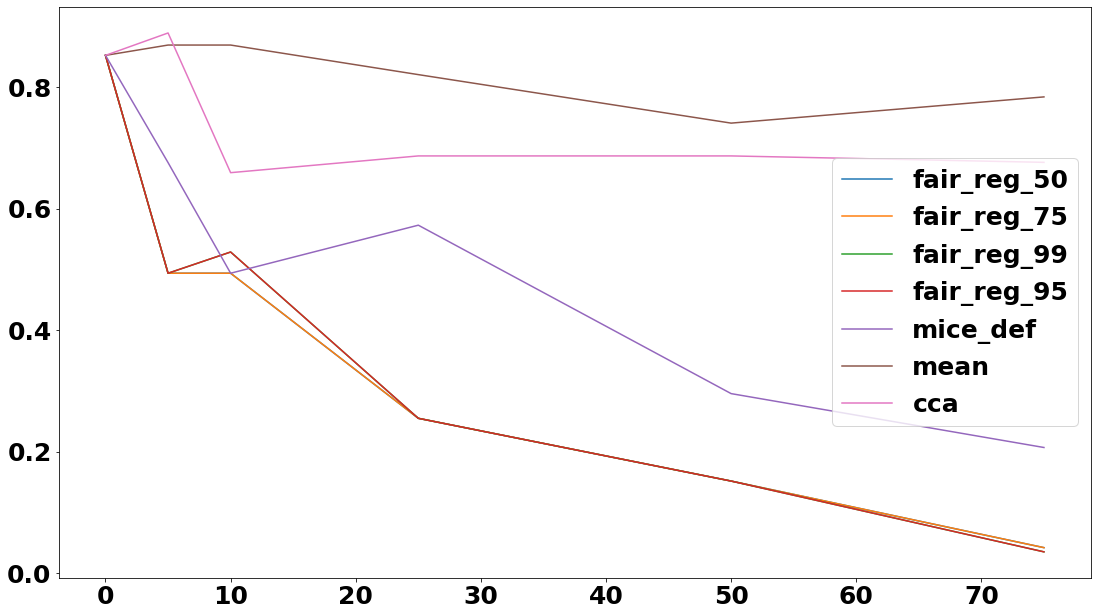

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(missing_pct, data["Averaged results"]['mcar|eosum|log_reg|fair_reg_50'], label = "fair_reg_50")

plt.plot(missing_pct, data["Averaged results"]['mcar|eosum|log_reg|fair_reg_95'], label = "fair_reg_95")
plt.plot(missing_pct, data["Averaged results"]['mcar|eosum|log_reg|mice_def'], label = "mice_def")
plt.plot(missing_pct, data["Averaged results"]['mcar|eosum|log_reg|mean'], label = "mean")
plt.plot(missing_pct, data["Averaged results"]['mcar|eosum|log_reg|cca'], label = "cca")
plt.legend()
plt.show()


In [ ]:
import os
from pathlib import Path
savepath = "final_experiment/"
if not os.path.isdir(Path("final_experiment/")):
    os.mkdir(Path(savepath))
    
import json
with open(Path(savepath+"non_robust_correct_fair.json"), 'w') as f:
    json.dump(data, f, indent=1)